In [1]:
import numpy as np
import os
import pandas as pd
from pandas import ExcelWriter
import matplotlib.pyplot as plt
import openpyxl
#%matplotlib notebook

import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.size'] = 12
mpl.rcParams['font.family'] = 'STIXGeneral'


Define which cores to work on, surface accumulation andd surface temperature.

In [2]:
coreNames_all = ['B16', 'B17','B18', 'B19', 'B20', 'B21', 'B22', 'B23', 'B26', 'B27', 'B28', 'B29', 'B30'] 
bdot0s = np.array([0.143, 0.115, 0.105, 0.091, 0.096, 0.105, 0.141, 0.116, 0.172, 0.165, 0.174, 0.137, 0.158])
Temp0s = np.array([-32.5, -32.3, -32.3, -30.9, -30.4, -30.1,-29.8, -29.3, -30.3, -30.6, -30.6, -31.6, -31.8])+ 273.15

coreNames_chosen = ['B16','B18','B19','B20','B21','B22','B23']#coreNames_all#
IDXcoreNames_chosen = [coreNames_all.index(coreNames_chosen[i]) for i in range(len(coreNames_chosen))]

bdot0s_chosen = bdot0s[IDXcoreNames_chosen]
Temp0s_chosen = Temp0s[IDXcoreNames_chosen]


Get depth/density data for chosen cores.

In [3]:
df_dens = []; dens0s = []
j = 0
for i in coreNames_chosen:
    df_dens.append(pd.read_excel('DepthDensity_Bcores_lowRes.xlsx', sheet_name=i, index=False))
    dens0s.append(df_dens[j]['density'][0])
    j += 1


Plot raw depth/density data for chosen cores.

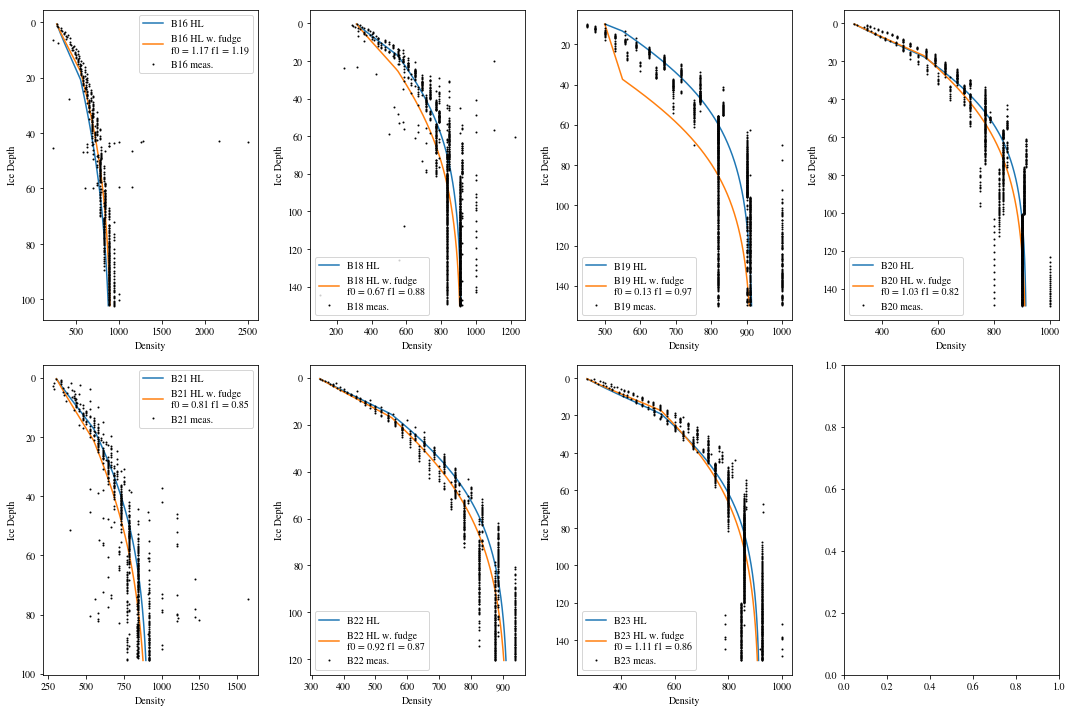

In [18]:
from HL_AnalyticThea_class import HL_Thea

fig, ax = plt.subplots(2,4,figsize = (15,10))



for i, ax1 in zip(range(len(coreNames_chosen)), ax.flatten()):
    bdot0 = bdot0s[i]
    Temp0 = Temp0s[i]
    dens0 = dens0s[i]
    
    z_vec = np.asarray(df_dens[i]['iceDepth'])
    rho_vec = np.asarray(df_dens[i]['density'])
    
    hl_instance = HL_Thea(z_meas = z_vec, rho_meas = rho_vec,\
                     Acc_0 = bdot0, Temp_0 = Temp0, rho_0 = dens0, opti = False)
    hl_model = hl_instance.model(z_vec)

    hl_instanceOpti = HL_Thea(z_meas = z_vec, rho_meas = rho_vec,\
                     Acc_0 = bdot0, Temp_0 = Temp0, rho_0 = dens0, opti = True)
    hl_modelOpti = hl_instanceOpti.model(z_vec)
    f0 = hl_modelOpti['f0_fin']; f1 = hl_modelOpti['f1_fin']
    
    ax1.set(xlabel='Density', ylabel='Ice Depth')
    ax1.invert_yaxis()
    ax1.plot(hl_model['rhoHL']*1000, z_vec, label=coreNames_chosen[i] + ' HL')
    ax1.plot(hl_modelOpti['rhoHL']*1000, z_vec, label=f'{coreNames_chosen[i]} HL w. fudge\nf0 = {f0:.2f} f1 = {f1:.2f}')
    
    ax1.plot(df_dens[i]['density'],df_dens[i]['iceDepth'],'k.', markersize=2,label=coreNames_chosen[i] + ' meas.')
    ax1.legend()
fig.tight_layout()
fig.savefig('Figures/fig_dens_B16B18B19B20B21B22B23.eps')

Get depth/density averaged data for chosen cores.

In [5]:
df_densAve = []; densAve0s = []
j = 0
for i in coreNames_chosen:
    df_densAve.append(pd.read_excel('DepthDensity_Bcores_lowResAve.xlsx', sheet_name=i, index=False))
    densAve0s.append(df_densAve[j]['density'][0])
    j += 1


Plot averaged depth/density profiles for chosen cores.

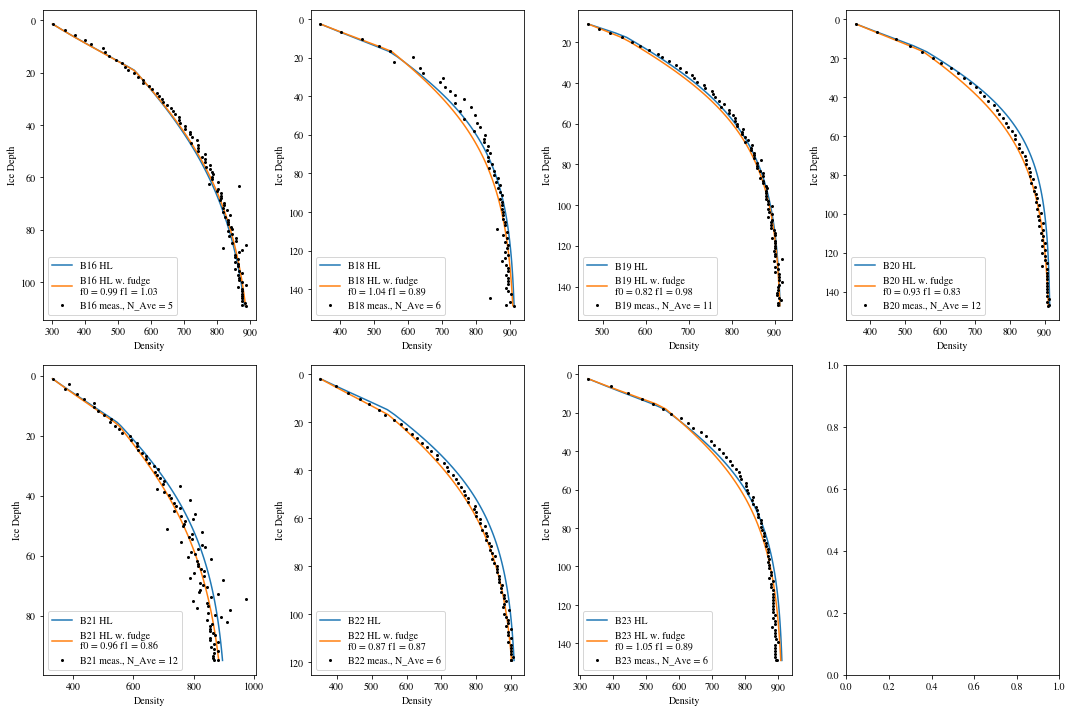

In [16]:
fig_Ave, ax_Ave = plt.subplots(2,4,figsize = (15,10))
N_aves = [5,6,11,12,12,6,6,9,4,8,1,5,7]

for i, ax1 in zip(range(len(coreNames_chosen)), ax_Ave.flatten()):
    
    bdot0 = bdot0s[i]
    Temp0 = Temp0s[i]
    dens0 = densAve0s[i]

    z_vec = np.asarray(df_densAve[i]['iceDepth'])

    rho_vec = np.asarray(df_densAve[i]['density'])

    ax1.set(xlabel='Density', ylabel='Ice Depth')
    ax1.invert_yaxis()

    
    hl_instance = HL_Thea(z_meas = z_vec, rho_meas = rho_vec,\
                     Acc_0 = bdot0, Temp_0 = Temp0, rho_0 = dens0, opti = False)
    hl_model = hl_instance.model(z_vec)

    hl_instanceOpti = HL_Thea(z_meas = z_vec, rho_meas = rho_vec,\
                     Acc_0 = bdot0, Temp_0 = Temp0, rho_0 = dens0, opti = True)
    hl_modelOpti = hl_instanceOpti.model(z_vec)
    f0 = hl_modelOpti['f0_fin']; f1 = hl_modelOpti['f1_fin']

    ax1.plot(hl_model['rhoHL']*1000, z_vec, label=coreNames_chosen[i] + ' HL')
    ax1.plot(hl_modelOpti['rhoHL']*1000, z_vec, label=f'{coreNames_chosen[i]} HL w. fudge\nf0 = {f0:.2f} f1 = {f1:.2f}')

    ax1.plot(df_densAve[i]['density'],df_densAve[i]['iceDepth'], 'k.', markersize=4,label=f'{coreNames_chosen[i]} meas., N_Ave = {N_aves[i]}')
#    ax1.errorbar(df_densAve[i]['density'],df_densAve[i]['iceDepth'], df_densAve[i]['STD'],fmt='.', color='darkolivegreen', solid_capstyle='projecting', capsize=2.5, alpha=0.5, markersize=2,label=f'{coreNames_chosen[i]} meas., N_Ave = {N_aves[i]}')
    ax1.legend()
fig_Ave.tight_layout()
fig_Ave.savefig('Figures/fig_densAve_B16B18B19B20B21B22B23.eps')